Displays some common plots given paths to nonreference and reference OceanView USB2000+ Ocean Optics spectrometer data. See code comments for usage.

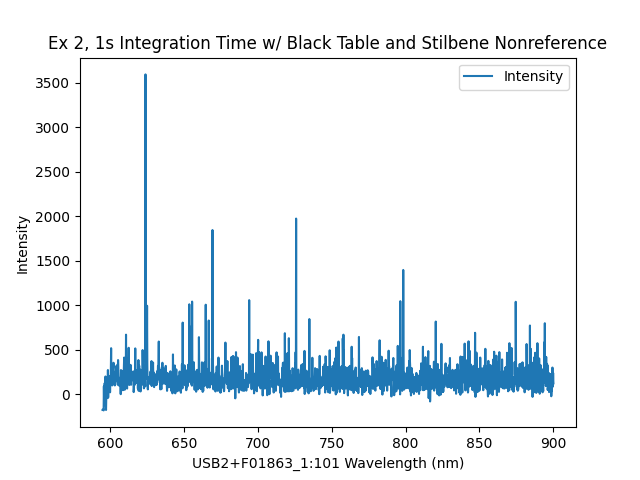

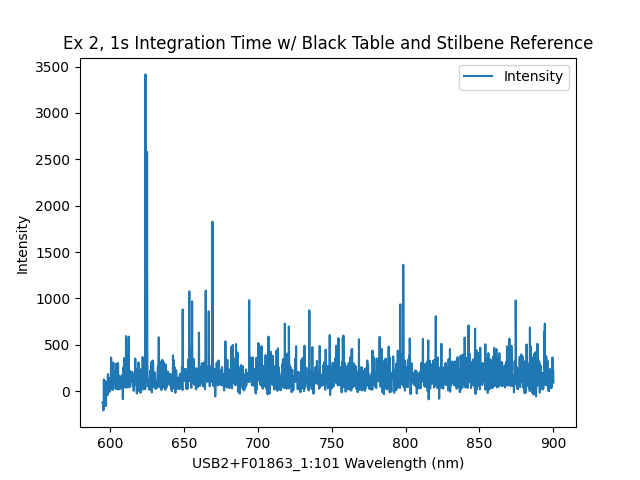

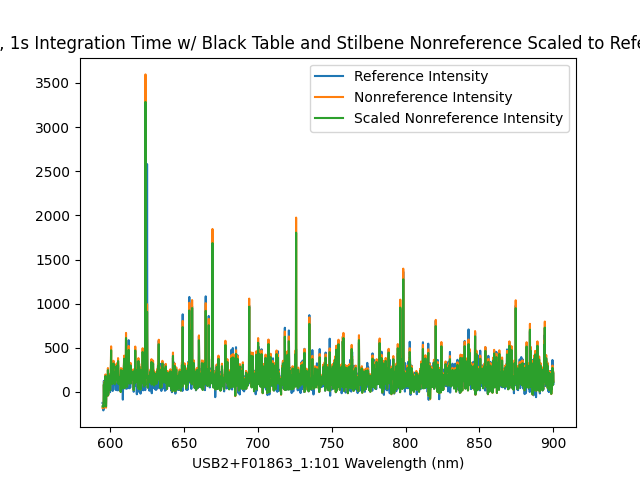

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#  Make the notebook display matplotlib graphs
%matplotlib widget

path_to_data_folder = "C:/Users/jrsha/UIUC/Abbamonte_research/Data" # folder where data is stored

### Given a file path to a tab-separated text file outputted by OceanView, reads the data into a dataframe 
###     renames columns to be more descriptive 
def read_ocean_optics(file_path):
    df = pd.read_csv(file_path, sep='\t')
    df.rename( columns={'Unnamed: 1':'Intensity'}, inplace=True )
    df.rename( columns={'USB2+F01863_1:101':'USB2+F01863_1:101 Wavelength (nm)'}, inplace=True )
    df.drop('Unnamed: 2', axis=1, inplace=True) # empty column remnant of how data is read
    return df

### Displays plots that are common when given reference and nonreference data. 
### Parameters are path_to_nonreference_data followed by path_to_reference_data followed by experiment title.
def display_common_plots_for_reference_and_nonreference_data(path_to_nonreference_data, path_to_reference_data, title):
    nonreference_df = read_ocean_optics(path_to_nonreference_data)
    reference_df = read_ocean_optics(path_to_reference_data)

    nonreference_df.plot(x='USB2+F01863_1:101 Wavelength (nm)', kind='line', title=(title + " Nonreference"))
    plt.ylabel("Intensity")

    reference_df.plot(x='USB2+F01863_1:101 Wavelength (nm)', kind='line', title=(title + " Reference"))
    plt.ylabel("Intensity")

    display_plot_of_scaled_data_fitted_to_reference(nonreference_df, reference_df, title)


### Displays plots that are common when given reference and nonreference data. 
### Parameters are nonreference_df followed by reference_df followed by experiment title.
def display_plot_of_scaled_data_fitted_to_reference(nonreference_df, reference_df, title):
    def scale_func(x, a):
        return a * x
    
    popt, _ = curve_fit(scale_func, nonreference_df['Intensity'], reference_df['Intensity'])

    scaled_data_fitted_to_reference_df = reference_df.copy()
    scaled_data_fitted_to_reference_df.rename( columns={'Intensity': 'Reference Intensity'}, inplace=True )
    scaled_data_fitted_to_reference_df['Nonreference Intensity'] = nonreference_df['Intensity']
    scaled_data_fitted_to_reference_df['Scaled Nonreference Intensity'] = nonreference_df['Intensity'] * popt[0]
    

    scaled_data_fitted_to_reference_df.plot(x='USB2+F01863_1:101 Wavelength (nm)', kind='line', title=(title + " Nonreference Scaled to Reference"))

# display common plots usage
display_common_plots_for_reference_and_nonreference_data((path_to_data_folder + "/11.13/ex2_uv_shined_on 1s int time/stilbene2.txt"), 
                                                         (path_to_data_folder + "/11.13/ex2_uv_shined_on 1s int time/black_table.txt"), 
                                                         "Ex 2, 1s Integration Time w/ Black Table and Stilbene")

